In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
data_sleep.shape

(706, 34)

In [3]:
Sleep_eq11 = smf.ols(formula = 'sleep~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+male+south', data = data_sleep).fit()

In [4]:
model_11 = smf.ols(formula = 'I(totwrk/100)~I(totwrk**2/10000)+age+smsa+male+south', data = data_sleep).fit()


In [5]:
model_12 = smf.ols(formula = 'I(totwrk**2/10000)~I(totwrk/100)+age+smsa+male+south', data = data_sleep).fit()

In [6]:
model_13 = smf.ols(formula = 'male~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+south', data = data_sleep).fit()

In [7]:
print(summary_col([model_11, model_12, model_13], stars=True, float_format='%.3f'))


                       I(totwrk / 100) I(totwrk ** 2 / 10000)   male  
----------------------------------------------------------------------
I(totwrk ** 2 / 10000) 0.021***                               -0.000  
                       (0.000)                                (0.000) 
I(totwrk / 100)                        40.125***              0.021***
                                       (0.609)                (0.005) 
Intercept              9.003***        -296.595***            0.057   
                       (0.498)         (23.551)               (0.085) 
R-squared              0.882           0.879                  0.147   
R-squared Adj.         0.881           0.878                  0.141   
age                    -0.008          0.038                  0.002   
                       (0.011)         (0.470)                (0.002) 
male                   1.071***        -2.883                         
                       (0.265)         (11.610)                       
smsa 

In [9]:
VIF_1 = 1/(1 - model_11.rsquared)
VIF_1.round(2)

8.48

In [10]:
VIF_2 = 1/(1 - model_12.rsquared)
VIF_2.round(2)

8.28

In [11]:
VIF_3 = 1/(1 - model_13.rsquared)
VIF_3.round(2)

1.17

# 1.2 Последствия

In [12]:
Sleep_eq11.model.exog_names

['Intercept',
 'I(totwrk / 100)',
 'I(totwrk ** 2 / 10000)',
 'age',
 'smsa',
 'male',
 'south']

In [13]:
VIF_1 = variance_inflation_factor(exog = Sleep_eq11.model.exog, exog_idx = 1)
print('VIF for exog', Sleep_eq11.model.exog_names[1], ': ', VIF_1.round(2))

VIF for exog I(totwrk / 100) :  8.48


In [14]:
VIF_2 = variance_inflation_factor(exog = Sleep_eq11.model.exog, exog_idx = 2)
print('VIF for exog', Sleep_eq11.model.exog_names[2], ': ', VIF_2.round(2))

VIF for exog I(totwrk ** 2 / 10000) :  8.28


In [15]:
VIF_3 = variance_inflation_factor(exog = Sleep_eq11.model.exog, exog_idx = 5)
print('VIF for exog', Sleep_eq11.model.exog_names[5], ': ', VIF_3.round(2))

VIF for exog male :  1.17


In [16]:
Sleep_eq12 = smf.ols(formula = 'sleep~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+male', data = data_sleep).fit()

In [17]:

info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(summary_col(Sleep_eq12, float_format='%.3f', stars=True, info_dict = info_dict))


                          sleep   
----------------------------------
Intercept              3428.805***
                       (76.655)   
I(totwrk / 100)        -8.195*    
                       (4.789)    
I(totwrk ** 2 / 10000) -0.214*    
                       (0.111)    
age                    2.817**    
                       (1.387)    
smsa                   -78.049**  
                       (32.072)   
male                   86.639**   
                       (34.200)   
R-squared              0.128      
R-squared Adj.         0.122      
No. Observations       706        
Residual Std. Error    416.457    
F-statistic            20.566     
Prob (F-statistic)     0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [18]:
df = summary_params(Sleep_eq12, alpha=0.05)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<0.05 else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3428.804849,76.655048,44.730320,2.023213e-207,3278.303493,3579.306204,Значим
I(totwrk / 100),-8.195316,4.789446,-1.711120,8.750201e-02,-17.598716,1.208085,Незначим
I(totwrk ** 2 / 10000),-0.214156,0.110951,-1.930194,5.398646e-02,-0.431992,0.003680,Незначим
age,2.816697,1.386926,2.030892,4.264340e-02,0.093663,5.539731,Значим
smsa,-78.049460,32.072351,-2.433543,1.520105e-02,-141.018991,-15.079930,Значим
male,86.638759,34.199952,2.533301,1.151657e-02,19.491986,153.785532,Значим


In [19]:
Sleep_eq12.f_test('I(totwrk / 100) = I(totwrk ** 2 / 10000)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=45.61921736003963, p=2.380853704322082e-19, df_denom=700, df_num=2>

In [20]:
alpha=0.05
scipy.stats.f.ppf(1-alpha, 2, 700).round(2)

3.01

In [21]:
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq12.model.exog, i) for i in range(int(Sleep_eq12.df_model+1))]}, index=Sleep_eq12.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
I(totwrk / 100),8.370495
I(totwrk ** 2 / 10000),8.199290
age,1.005968
smsa,1.004459
male,1.169198


In [22]:
df_sleep = data_sleep[['male', 'age', 'smsa']].copy()
df_sleep['I(totwrk / 100)'] = data_sleep['totwrk']/100
df_sleep['I(totwrk ** 2 / 10000)'] = (data_sleep['totwrk']**2)/10000
corr_matrix = df_sleep.corr().round(3)
corr_matrix

,male,age,smsa,I(totwrk / 100),I(totwrk ** 2 / 10000)
male,1.000,0.032,0.007,0.376,0.351
age,0.032,1.000,0.025,-0.050,-0.046
smsa,0.007,0.025,1.000,-0.038,-0.051
I(totwrk / 100),0.376,-0.050,-0.038,1.000,0.937
I(totwrk ** 2 / 10000),0.351,-0.046,-0.051,0.937,1.000


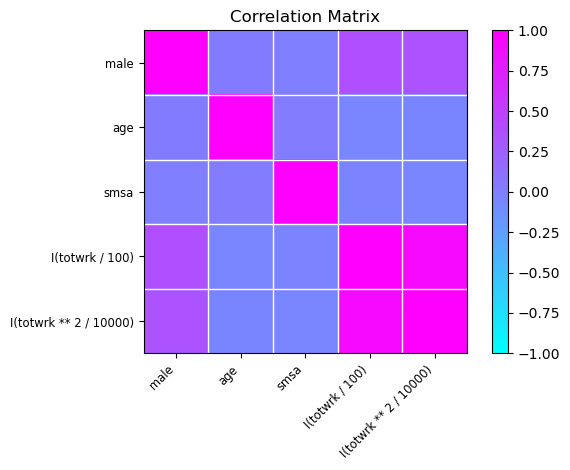

In [28]:
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='cool')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

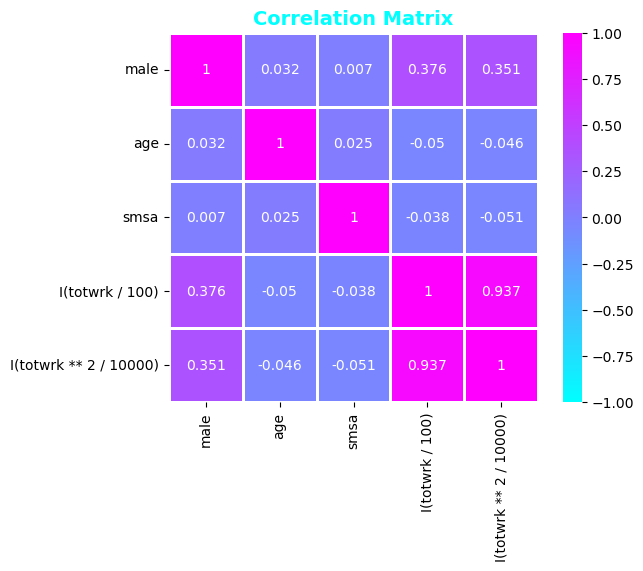

In [29]:
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='cool', 
            square=True, linewidths=1, linecolor='white')
plt.title('Correlation Matrix', loc='center', color='cyan', size=14, weight='bold')

# 2 sleep equation #2

In [76]:
data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
data_sleep['totwrk2_10000'] = data_sleep['totwrk']**2/10000

In [77]:
Sleep_eq11 = smf.ols(formula = 'sleep~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+male', data = data_sleep).fit()

In [78]:
model_11 = smf.ols(formula = 'age~totwrk+age+smsa+male+south', data = data_sleep).fit()

In [79]:
model_12 = smf.ols(formula = 'age**2~totwrk+age+smsa+male+south', data = data_sleep).fit()

In [80]:
model_13 = smf.ols(formula = 'male~totwrk+age+age**2+smsa+south', data = data_sleep).fit()

In [81]:
model_11.params.round

<bound method Series.round of Intercept    7.371881e-14
totwrk      -1.236966e-15
age          1.000000e+00
smsa        -4.218847e-15
male        -3.108624e-15
south        4.440892e-16
dtype: float64>

In [82]:
VIF_age=1/(1-model_11.rsquared)
VIF_age

/var/folders/4m/tcsh4cm95w30hhv5sn63n2dw0000gn/T/ipykernel_36687/4124883484.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_age=1/(1-model_11.rsquared)


inf

# 3 sleep equation #3

In [90]:
data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')


In [91]:
model = smf.ols(data = data_sleep , formula = 'sleep~totwrk+south+totwrk*south+age+male+smsa').fit() #main
model_1 = smf.ols(data = data_sleep , formula = 'totwrk~south+totwrk+south+age+male+smsa').fit()
model_2 = smf.ols(data = data_sleep , formula = 'south~totwrk+totwrk+south+age+male+smsa').fit()
model_3 = smf.ols(data = data_sleep , formula = 'totwrk*south~totwrk+totwrk+south+age+male+smsa').fit()
model_1.params.round(3)

ValueError: endog has evaluated to an array with multiple columns that has shape (706, 3). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).